In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')


In [6]:
df = pd.read_csv(r"G:\GIT_Project-2025\iris_project\data_sets\Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


               Null Count  Null Percentage
Id                      0              0.0
SepalLengthCm           0              0.0
SepalWidthCm            0              0.0
PetalLengthCm           0              0.0
PetalWidthCm            0              0.0
Species                 0              0.0


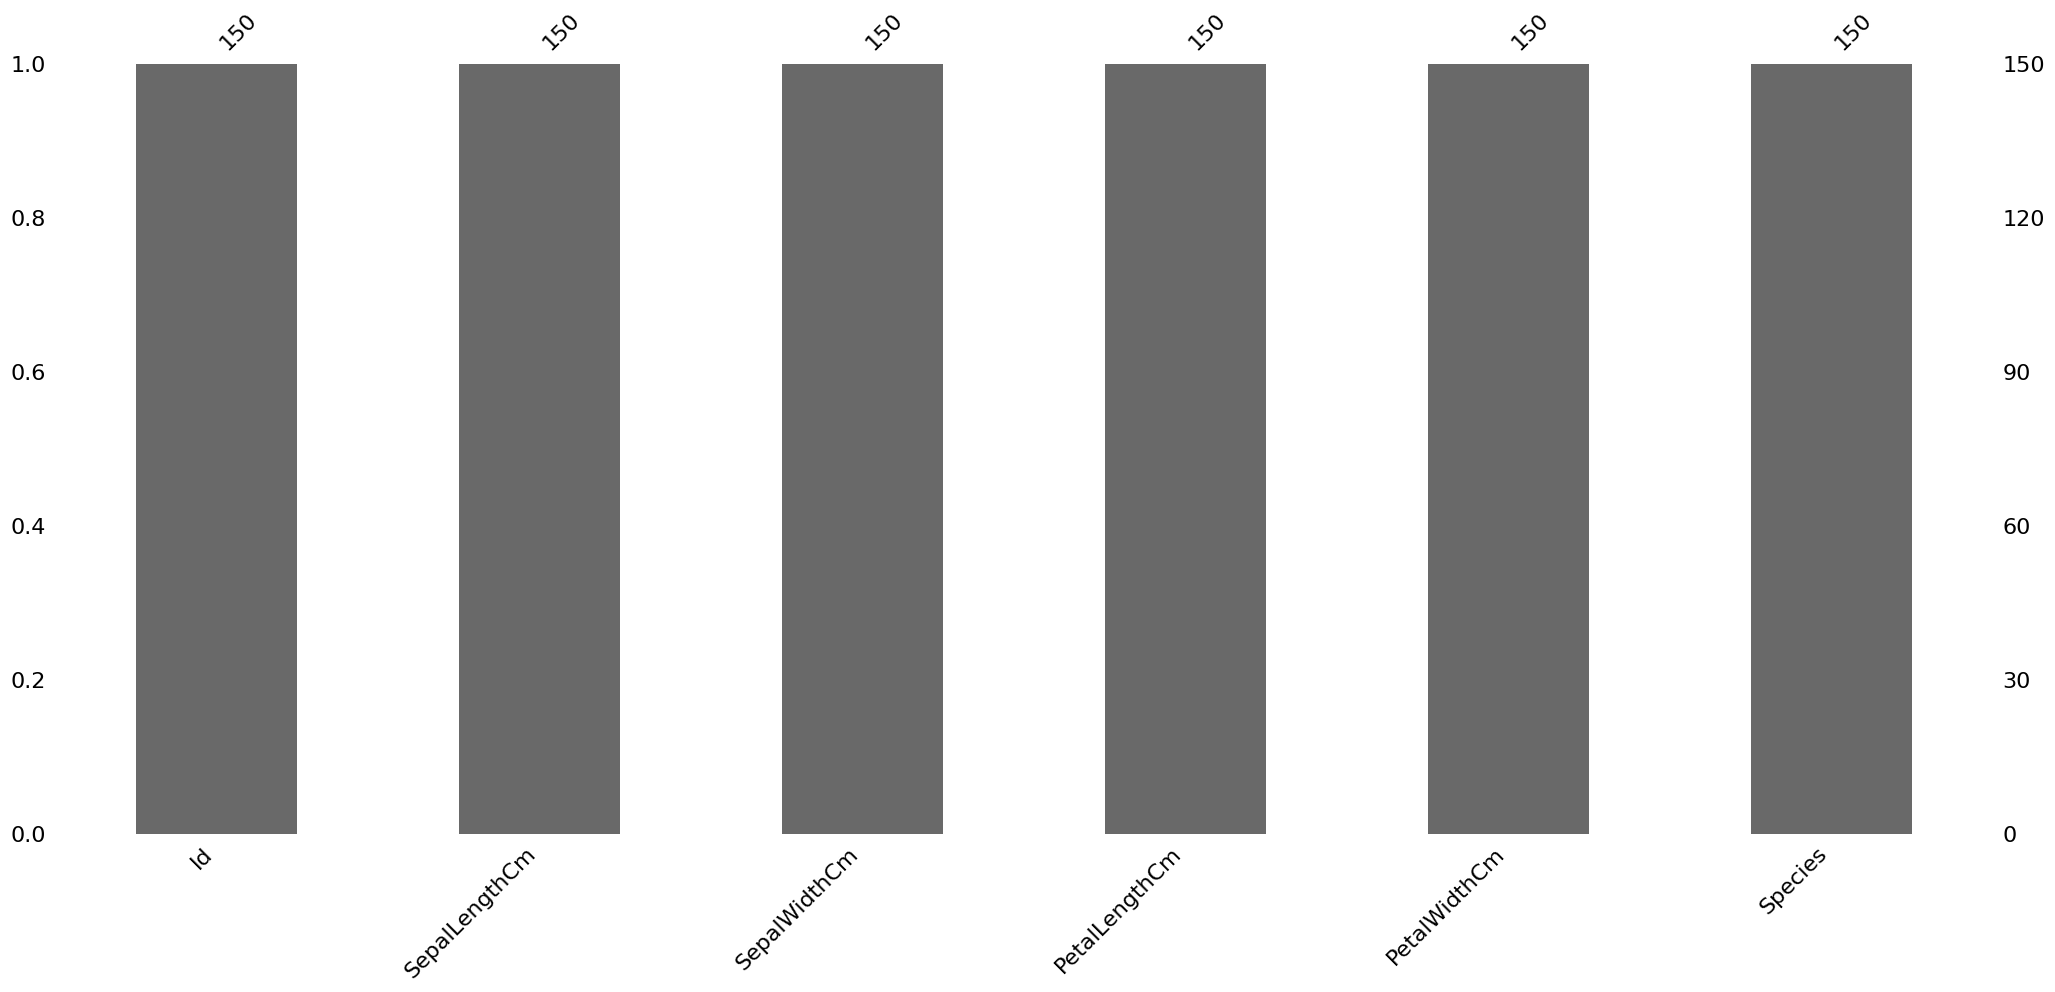

In [9]:
null_count = df.isnull().sum()
null_per = ((df.isnull().sum()/len(df))*100).round(2)

result_null = pd.DataFrame({'Null Count':null_count, 'Null Percentage':null_per})
print(result_null)
msno.bar(df)
plt.show()

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.drop(columns=['Id'], inplace=True)

In [12]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


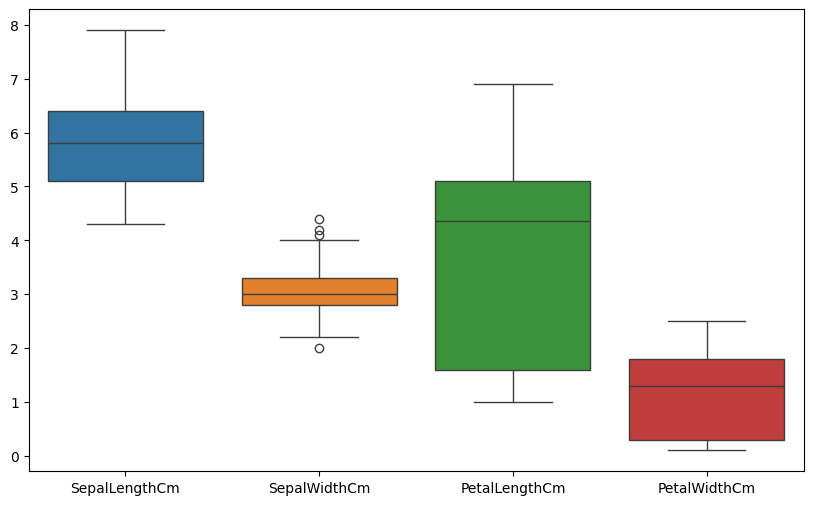

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(df)
plt.show()

In [14]:
cat_columns=df.select_dtypes(include='object').columns
num_columns=df.select_dtypes(include='number').columns
print(f"Categorical columns {cat_columns} \nNumerical columns {num_columns}")


Categorical columns Index(['Species'], dtype='object') 
Numerical columns Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')


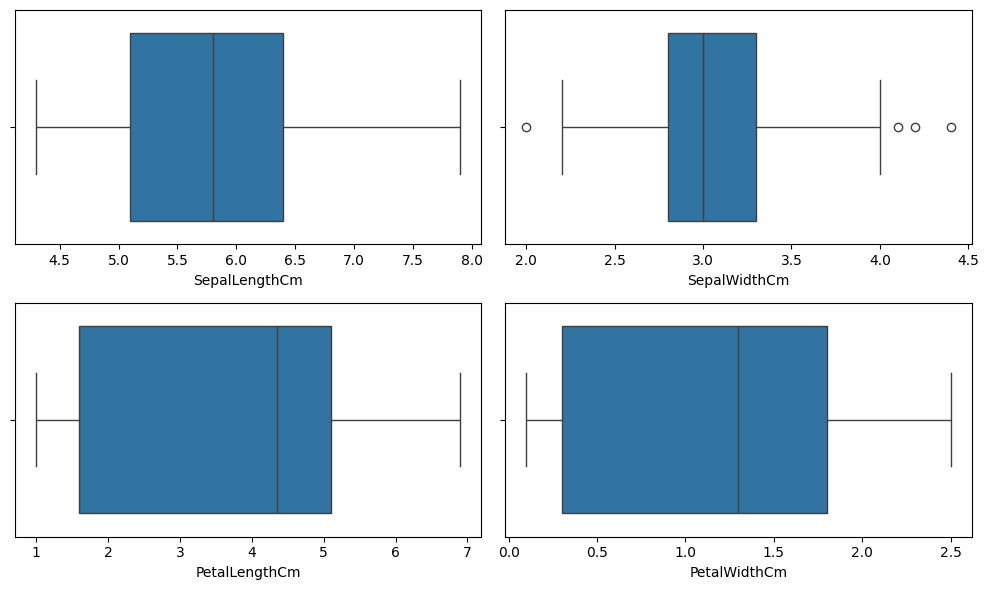

In [15]:
num_columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
plt.figure(figsize=(10,6))

for i, col in enumerate(num_columns,1):
      plt.subplot(2,2,i)
      sns.boxplot(x=df[col])
plt.tight_layout()
plt.show()


In [16]:
for col in num_columns:
      Q1 = df[col].quantile(0.25)
      Q3 = df[col].quantile(0.75)
      IQR = Q3-Q1
      lower_bound = Q1-IQR*1.5
      upper_bound = Q3+IQR*1.5

      df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

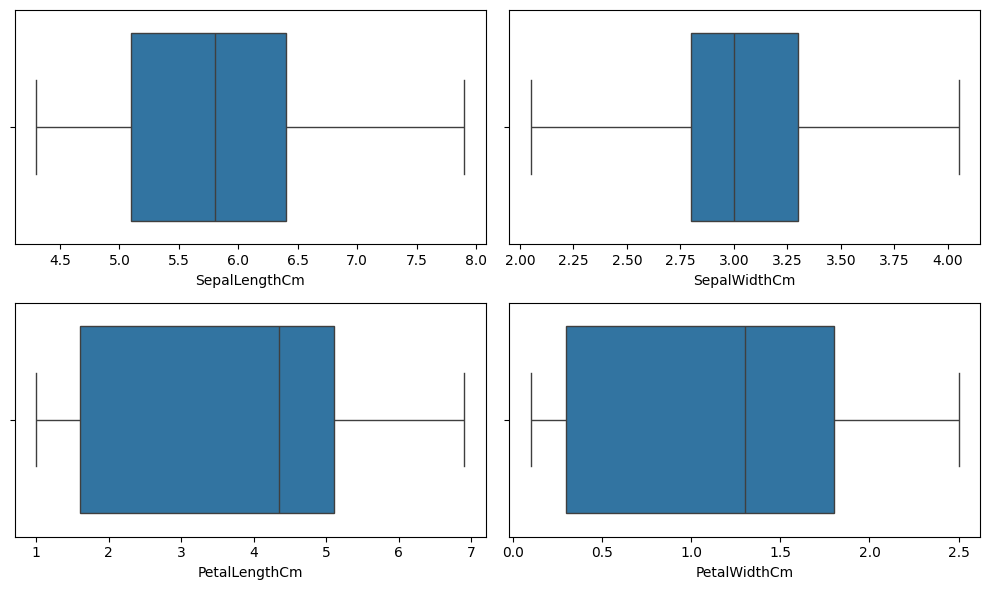

In [17]:
num_columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
plt.figure(figsize=(10,6))

for i, col in enumerate(num_columns,1):
      plt.subplot(2,2,i)
      sns.boxplot(x=df[col])
plt.tight_layout()
plt.show()

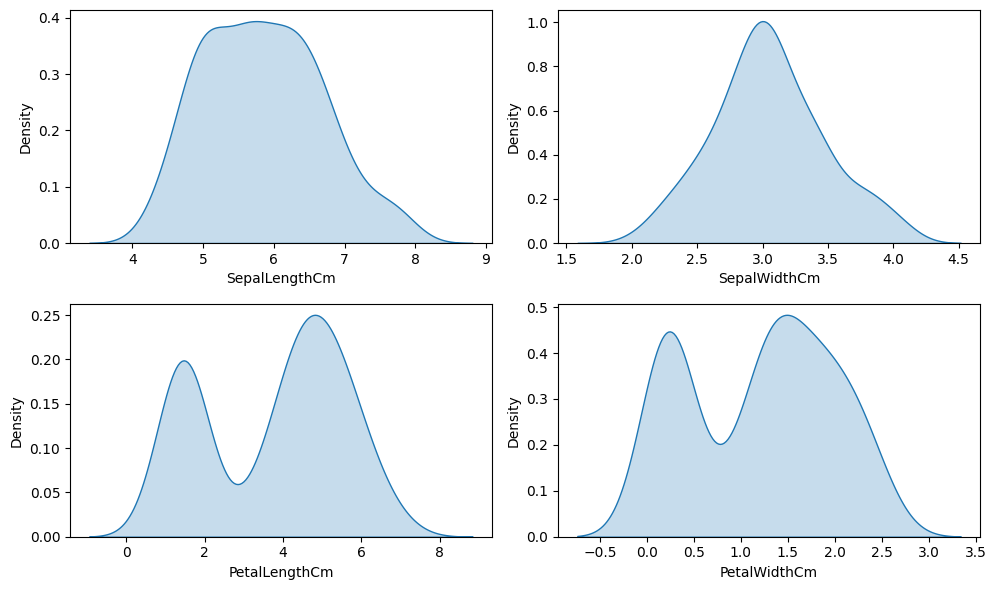

In [20]:
num_columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
plt.figure(figsize=(10,6))

for i, col in enumerate(num_columns,1):
      plt.subplot(2,2,i)
      sns.kdeplot(x=df[col], fill=True)
plt.tight_layout()
plt.show()

In [19]:
num_columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

for col in num_columns:
      skewness = df[col].skew()

      if skewness>0:
            skew_type="Right Skew"

      elif skewness<0:
            skew_type="Left Skew"

      else: 
            skew_type="Approximately normal"
      print(f"column={col}: skewness ={skewness} Distribution={skew_type}")

column=SepalLengthCm: skewness =0.3149109566369728 Distribution=Right Skew
column=SepalWidthCm: skewness =0.20709413403739355 Distribution=Right Skew
column=PetalLengthCm: skewness =-0.27446425247378287 Distribution=Left Skew
column=PetalWidthCm: skewness =-0.10499656214412734 Distribution=Left Skew


The skewness values in the data are between -0.5 and 0.5, your distributions are already approximately normal.

In [21]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [22]:
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
SepalLengthCm       1.000000     -0.110343       0.871754      0.817954   
SepalWidthCm       -0.110343      1.000000      -0.419823     -0.355582   
PetalLengthCm       0.871754     -0.419823       1.000000      0.962757   
PetalWidthCm        0.817954     -0.355582       0.962757      1.000000   
Species             0.782561     -0.419264       0.949043      0.956464   

                Species  
SepalLengthCm  0.782561  
SepalWidthCm  -0.419264  
PetalLengthCm  0.949043  
PetalWidthCm   0.956464  
Species        1.000000  


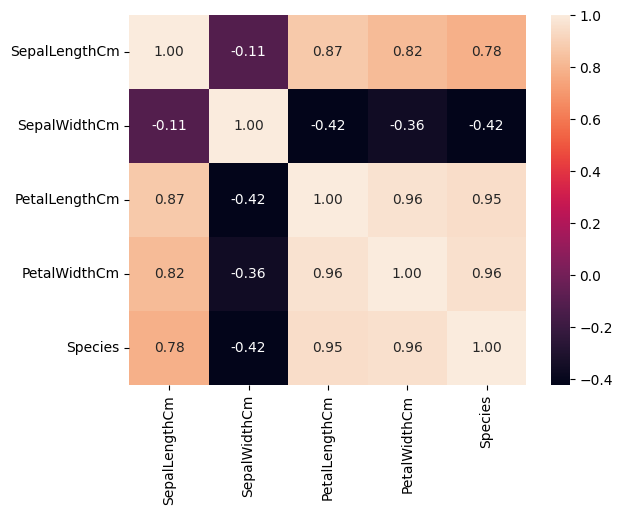

In [26]:
matrix = df.corr()
print(matrix)
sns.heatmap(matrix,annot=True,fmt='.2f')
plt.show()

Feature Selection:
Since PetalLengthCm and PetalWidthCm are highly correlated, you could consider using only one of them to reduce multicollinearity, particularly if using a linear model.

Alternatively, you could use a model that handles multicollinearity well, such as tree-based models (e.g., Random Forest or Gradient Boosting).